<a href="https://colab.research.google.com/github/shubhamgautam1211/Machine-Learning-Standalone/blob/main/SG_14_NaiveBayes_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn import svm
from statistics import mean
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('Titanic dataset.csv')
df.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S


In [ ]:
df.nunique()

pclass         3
survived       2
name        1307
sex            2
age           98
sibsp          7
parch          8
ticket       929
fare         281
cabin        186
embarked       3
dtype: int64

In [ ]:
df['sex'] = df['sex'].replace(["female", "male"], [0, 1])
df['embarked'] = df['embarked'].replace(['S', 'C', 'Q'], [1, 2, 3])

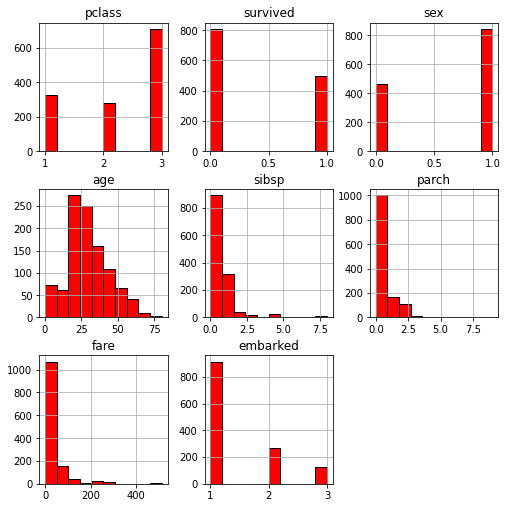

In [ ]:
df.hist(figsize=(7,7),color='r',edgecolor='black')
plt.tight_layout(pad=0.5)
plt.show()

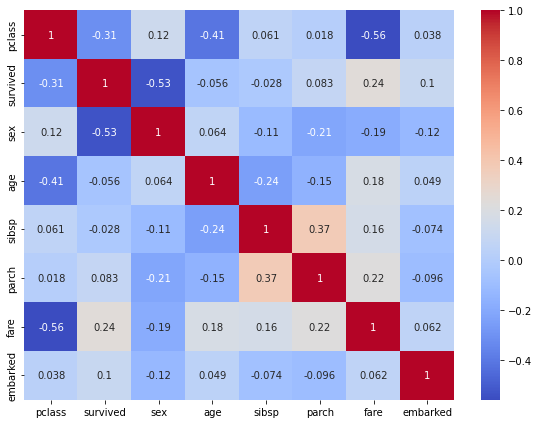

In [ ]:
corr = df.corr()           # closer to 1,-1 more is the co-relation 
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,cmap = "coolwarm")
plt.tight_layout()
plt.show()

###**Also 'Pclass' and 'fare' are -0.56, so had to remove one among them**

###**Cabin is having 1014 missing values**

### **Name , ticket no. is containing string**


In [ ]:
df.drop(['pclass','cabin','name','ticket'],axis=1,inplace=True)
df.head(5)

,survived,sex,age,sibsp,parch,fare,embarked
0,1,0,29.0000,0,0,211.3375,1.0
1,1,1,0.9167,1,2,151.5500,1.0
2,0,0,2.0000,1,2,151.5500,1.0
3,0,1,30.0000,1,2,151.5500,1.0
4,0,0,25.0000,1,2,151.5500,1.0


## **Imputing missing values**

In [ ]:
df.isnull().sum()

survived      0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
dtype: int64

In [ ]:
imp = SimpleImputer(missing_values=np.nan,strategy='mean')
df2 = df.copy()
df2 = imp.fit_transform(df2)
df2 = pd.DataFrame(df2,columns=df.columns)

df2.head()

,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,0.0,29.0000,0.0,0.0,211.3375,1.0
1,1.0,1.0,0.9167,1.0,2.0,151.5500,1.0
2,0.0,0.0,2.0000,1.0,2.0,151.5500,1.0
3,0.0,1.0,30.0000,1.0,2.0,151.5500,1.0
4,0.0,0.0,25.0000,1.0,2.0,151.5500,1.0


In [ ]:
df2.isnull().sum()

survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

## **Check for the outliers in the columns and treat the outliers if present**

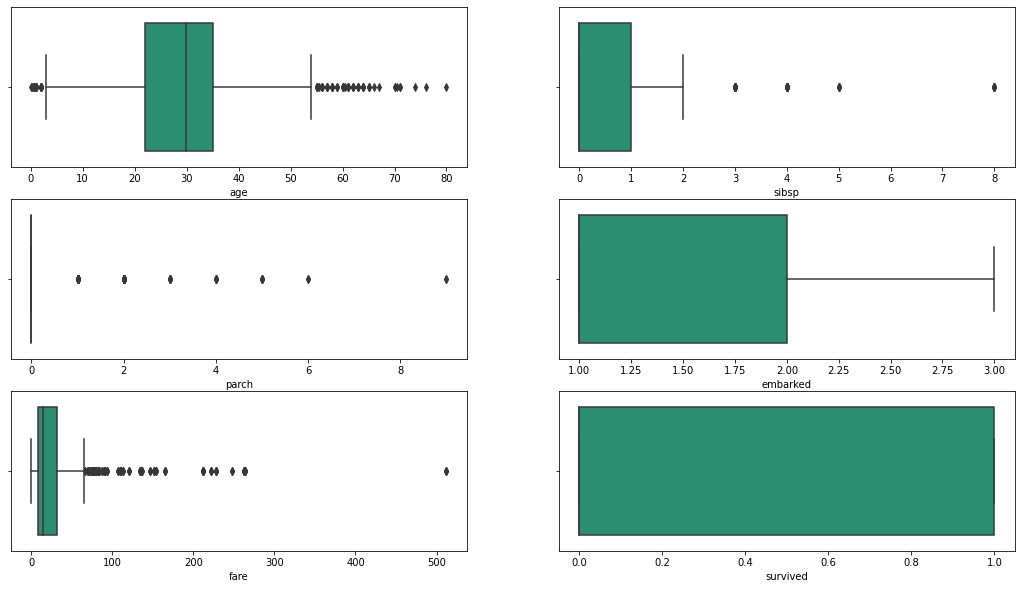

In [ ]:
plt.figure(figsize=(18,10))
plt.subplot(3,2,1)
sns.boxplot(x = df2['age'],palette='Dark2')
plt.subplot(3,2,2)
sns.boxplot(x = df2['sibsp'],palette='Dark2')
plt.subplot(3,2,3)
sns.boxplot(x = df2['parch'],palette='Dark2')
plt.subplot(3,2,4)
sns.boxplot(x = df2['embarked'],palette='Dark2')
plt.subplot(3,2,5)
sns.boxplot(x = df2['fare'],palette='Dark2')
plt.subplot(3,2,6)
sns.boxplot(x = df2['survived'],palette='Dark2')
plt.show()

## **Fare having most number of outliers**

## **Exploring Treating outliers using both log transformation and Inter-Quartile Range**

In [ ]:
'''df2["fare2"] = df2["fare"].map(lambda i: np.log(i) if i > 0 else 0)

print("Skew before : ", df2['fare'].skew())
print("Skew after : ",df2['fare2'].skew())'''

Skew before :  4.369374593951007
Skew after :  0.5675043861986597


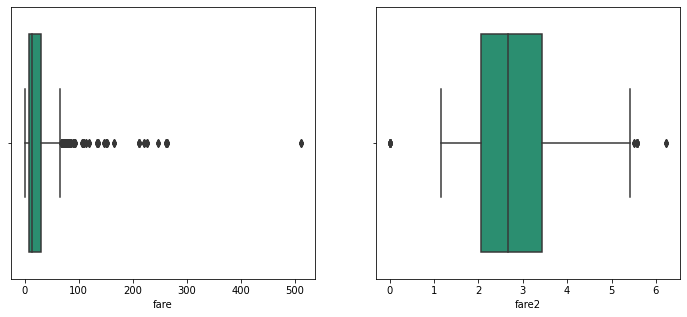

In [ ]:
'''plt.figure(figsize=(12,5))            # comparing before and after applying log 
plt.subplot(1,2,1)
sns.boxplot(x = df2['fare'],palette='Dark2')
plt.subplot(1,2,2)
sns.boxplot(x = df2['fare2'],palette='Dark2')

plt.show()'''

In [ ]:
'''df2.head()'''

,survived,sex,age,sibsp,parch,fare,embarked,fare2
0,1.0,0.0,29.0000,0.0,0.0,211.3375,1.0,5.353456
1,1.0,1.0,0.9167,1.0,2.0,151.5500,1.0,5.020916
2,0.0,0.0,2.0000,1.0,2.0,151.5500,1.0,5.020916
3,0.0,1.0,30.0000,1.0,2.0,151.5500,1.0,5.020916
4,0.0,0.0,25.0000,1.0,2.0,151.5500,1.0,5.020916


## **Inter quartile giving better results than log transform**

In [ ]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [ ]:
outlier_cols = ["fare"] 
for col in outlier_cols:
  l,u = outlier_treatment(df2[col])
  df3 = df2[ (df2[col] > u) | (df2[col] < l) ]
  df2.drop(df3.index , inplace=True)

df2.shape

(1138, 7)

# **Split the dataset into train and test.**

In [ ]:
X_feature = df2.loc[:, df2.columns != 'survived']
Y_target = df2.loc[:, df2.columns == 'survived']

print(X_feature.shape)
print(Y_target.shape)

(1138, 6)
(1138, 1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_feature, Y_target, test_size = 0.2,random_state = 10)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(910, 6)
(228, 6)
(910, 1)
(228, 1)


# **Construct Naïve Bayes model**

In [ ]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB() 

In [ ]:
Train_pred = classifier.fit(X_train, Y_train.values.ravel())
Train_pred

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
Test_pred = classifier.fit(X_test, Y_test.values.ravel())
Test_pred

GaussianNB(priors=None, var_smoothing=1e-09)

**Accuracy score**

In [ ]:
prediction_train_gauss = round(Train_pred.score(X_train, Y_train) * 100, 2)

print("Accuracy Score after Gaussian Naive Bayes (Training subset) : ",prediction_train_gauss)

prediction_test_gauss = round(Test_pred.score(X_test, Y_test) * 100, 2)

print("Accuracy Score after Gaussian Naive Bayes (Testing subset) : ",prediction_test_gauss)

Accuracy Score after Gaussian Naive Bayes (Training subset) :  75.82
Accuracy Score after Gaussian Naive Bayes (Testing subset) :  78.51


**probability of surviving** 

In [ ]:
print('Probability of each class')  #Prior probabilities of the classes
print('Survive = 0: %.2f' % classifier.class_prior_[0])
print('Survive = 1: %.2f' % classifier.class_prior_[1])

Probability of each class
Survive = 0: 0.62
Survive = 1: 0.38


## **Confusion matrix**

In [ ]:
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

cf_matrix = confusion_matrix(Y_test, y_pred)
cf_matrix

array([[120,  22],
       [ 27,  59]])

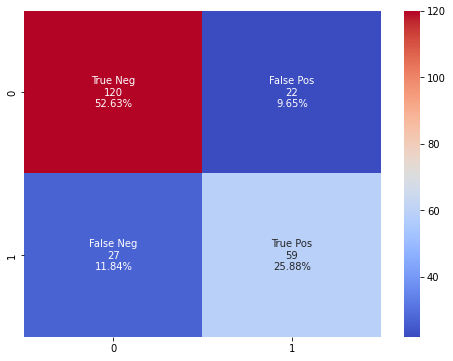

In [ ]:
plt.figure(figsize=(8,6))

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
          
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='coolwarm')

## **classification Metrics**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

asc = accuracy_score(Y_test,y_pred)
asc2 = accuracy_score(Y_train,y_pred_train)

print("Accuracy Score of testing subset: ",asc*100)
print("Accuracy Score of training subset: ",asc2*100)

print("------------------------------------------------")

ps = precision_score(Y_test, y_pred,average=None)
m1 = ps.max()
ps2 = precision_score(Y_train, y_pred_train,average=None)
m2 = ps2.max()

print("Precision Score of testing subset: ",m1)
print("Precision Score of training subset: ",m2)

print("------------------------------------------------")

rs = recall_score(Y_test, y_pred,average=None)
m3 = rs.max()
rs2 = recall_score(Y_train, y_pred_train,average=None)
m4 = rs2.max()

print("Recall Score of testing subset: ",m3)
print("Recall Score of training subset: ",m4)

print("------------------------------------------------")

fs = f1_score(Y_test, y_pred,average=None)
m5 = fs.max()
fs2 = f1_score(Y_train, y_pred_train,average=None)
m6 = fs2.max()

print("F1 Score of testing subset: ",m5)
print("F1 Score of training subset: ",m6)

Accuracy Score of testing subset:  78.50877192982456
Accuracy Score of training subset:  75.82417582417582
------------------------------------------------
Precision Score of testing subset:  0.8163265306122449
Precision Score of training subset:  0.8205980066445183
------------------------------------------------
Recall Score of testing subset:  0.8450704225352113
Recall Score of training subset:  0.8151815181518152
------------------------------------------------
F1 Score of testing subset:  0.8304498269896193
F1 Score of training subset:  0.8178807947019867
